# A simple demo of quantum circuit and adiabatic computation equivalence

This 2 qubit circuits takes $$|00>$$ and transforms it to $$\frac{|11>+|00>}{\sqrt{2}}$$
I want to show an equivalent adiabatic computation.


In [1]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt

Create |00> state

In [2]:
q = tensor( [Qobj([[1],[0]])] * 2)
q

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

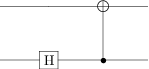

In [78]:
EPRC =  QubitCircuit(2)
EPRC.add_gate("SNOT",0)
EPRC.add_gate("CNOT",1,0)
display(EPRC)

Evaluate the circuit on |00>

In [4]:
U_EPRC = gate_sequence_product(EPRC.propagators())
U_EPRC*q

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]]

This state is indeed $$\frac{|11>+|00>}{\sqrt{2}}$$ lets try doing with adiabatic computation !

In [5]:
simple_matrix = Qobj([[-1,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]], dims = [[2,2],[2,2]])
simple_matrix

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

Show eigenstates and eigenenergies of the simple matrix 

In [6]:
for energy,state in zip(*simple_matrix.eigenstates()):
    print ("Energy %s " % energy)
    display(state)

Energy -1.0 


Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

Energy 0.0 


Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]]

Energy 0.0 


Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]]

Energy 0.0 


Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

We can see that |00> is an eigenstate of the system with eigenenergy -1, which is the lowest awong the eigenstates.

# Adiabatic computation

In [7]:
tlist = np.linspace(0, 500, 100)

## Let's examine the evolution of the |00>
We expect that under a constant hamiltonian, for which |00> is it's ground state - the |00> state probability will be stable.

In [8]:
states_evolution = mesolve(simple_matrix, q, tlist, [], [],{})
expectation_evolution = mesolve(simple_matrix, q, tlist, [], [simple_matrix],{})

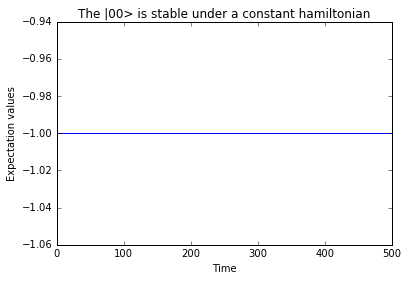

In [9]:
plt.plot(tlist,np.real(expectation_evolution.expect[0]))
plt.title("The |00> is stable under a constant hamiltonian")
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.show()

In [10]:
print ("Before")
display(states_evolution.states[0])
print ("After")
end_state = states_evolution.states[-1]
display(end_state)
print ("Abs value of the 00 coefficient is abs(%s+%s)=%s" %
       (np.real(end_state[0][0][0]),
        np.imag(end_state[0][0][0]),
        np.abs(end_state[0][0][0])))

Before


Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]]

After


Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[-0.88343081-0.46856162j]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]
 [ 0.00000000+0.j        ]]

Abs value of the 00 coefficient is abs(-0.8834308148718741+-0.4685616238391875)=1.0


## Let's examine the |00> state under time dependant hamiltonian
Define the hamiltonian transition callback
$$H(t)= \frac{H_0\cdot (t_{max}-t)}{t_{max}}+\frac{H_1\cdot t}{t_{max}}$$

# A simple demo of quantum circuit and adiabatic computation equivalence

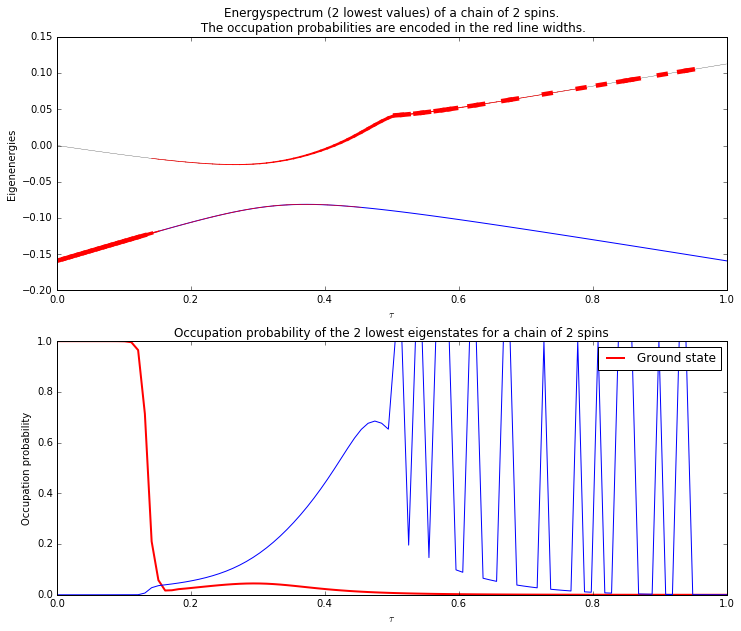

In [29]:
simulate_adiabatic_process(tlist,simple_matrix,U_EPRC,q)

Let's play with the parameters : 

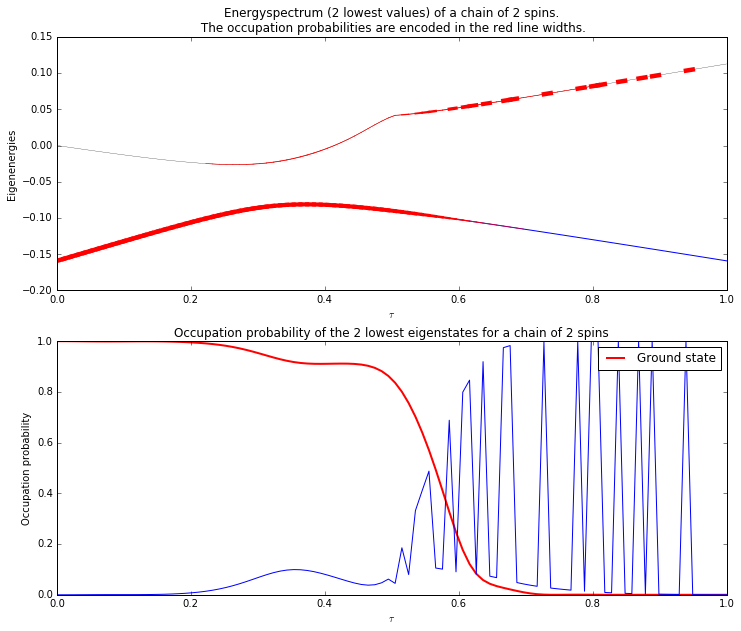

In [13]:
tlist = np.linspace(0, 50, 100) # fast process
simulate_adiabatic_process(tlist,simple_matrix,U_EPRC,q)

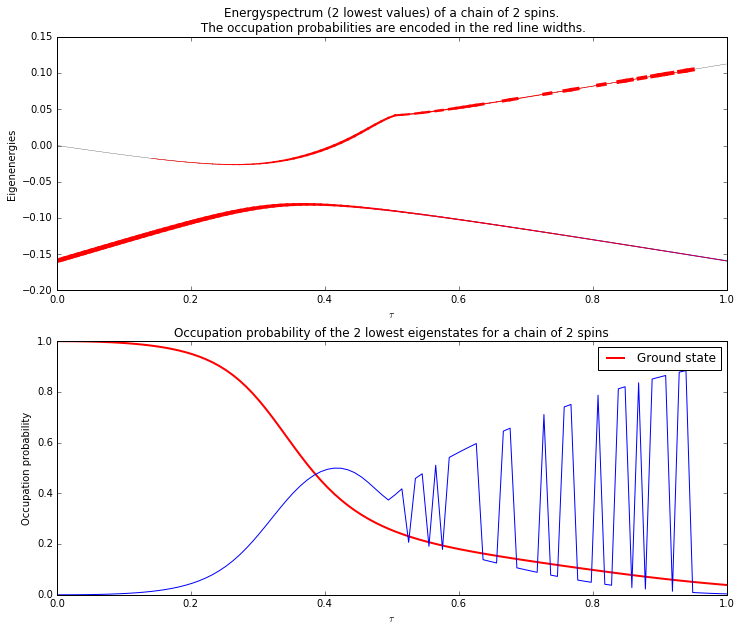

In [15]:
tlist = np.linspace(0, 5, 100) #even faster process
simulate_adiabatic_process(tlist,simple_matrix,U_EPRC,q)

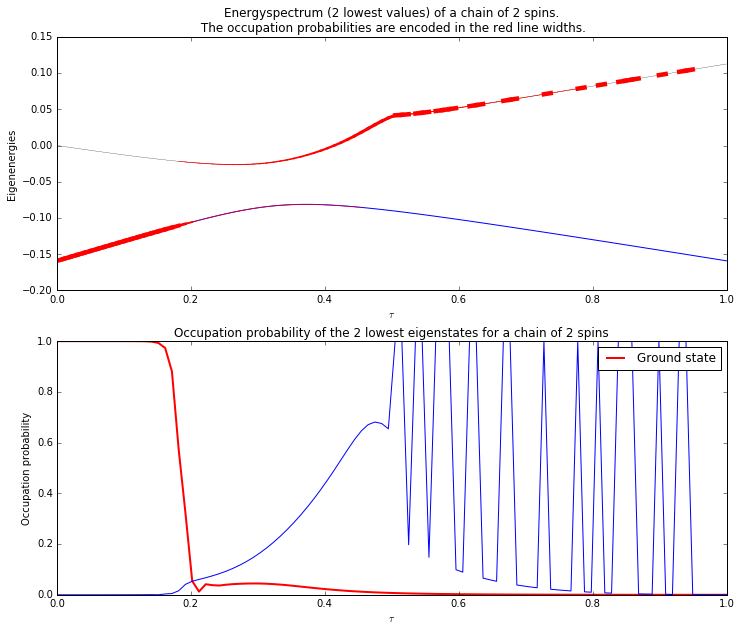

In [16]:
tlist = np.linspace(0, 1000, 100) #slow  process
simulate_adiabatic_process(tlist,simple_matrix,U_EPRC,q)

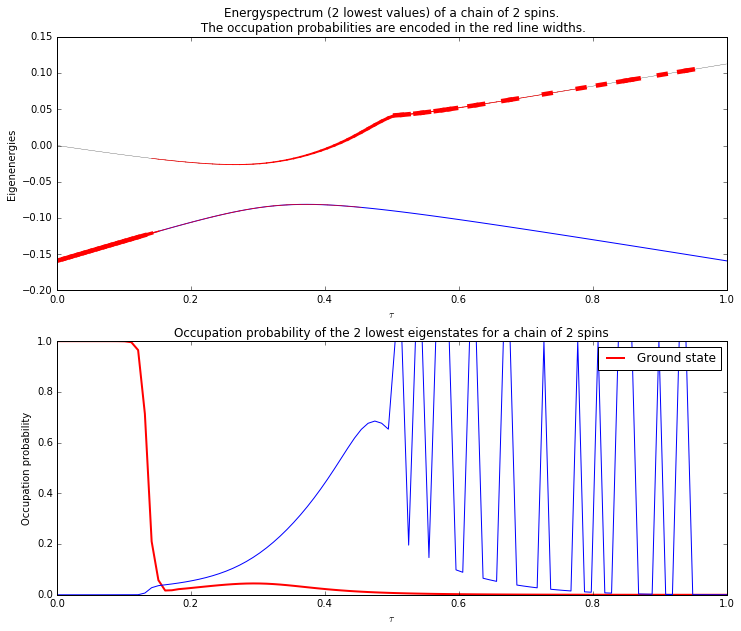

In [17]:
tlist = np.linspace(0, 2000, 100) #slower  process
simulate_adiabatic_process(tlist,simple_matrix,U_EPRC,q)

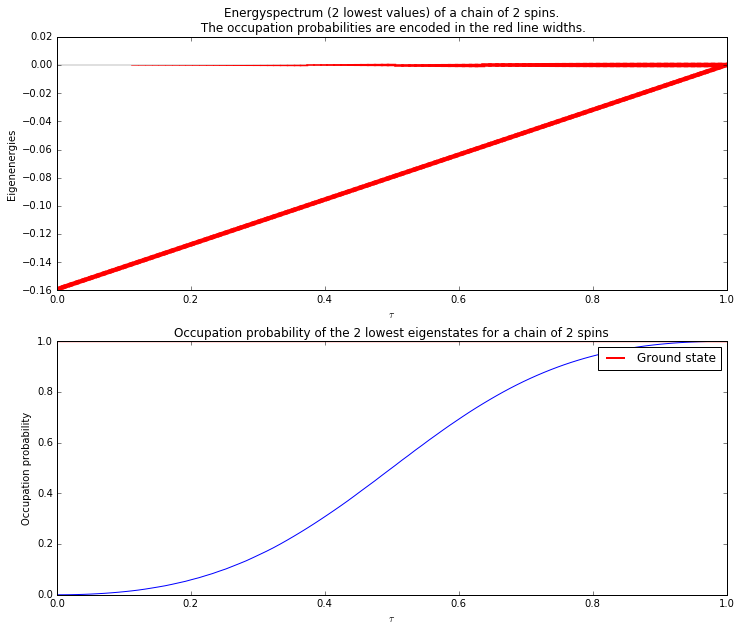

In [66]:
simple_matrix2 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[-1,0,0,0]], dims = [[2,2],[2,2]])
simulate_adiabatic_process(tlist,simple_matrix,simple_matrix2,q)

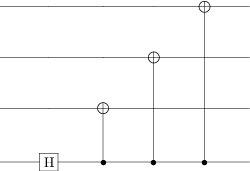

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

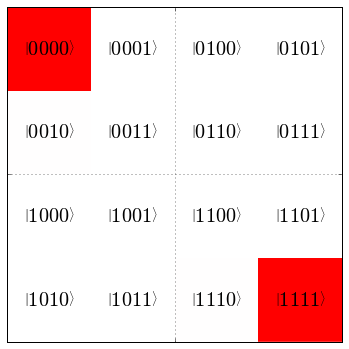

In [98]:
HADAMARD = "SNOT"
CAT_GEN =  QubitCircuit(4)
CAT_GEN.add_gate(HADAMARD,0)
for i in range(1,CAT_GEN.N):
    CAT_GEN.add_gate("CNOT",i,0)
display(CAT_GEN)
state_4_0 = tensor([basis(2,0)]*4)
display(state_4_0)
output = gate_sequence_product(CAT_GEN.propagators())*state_4_0
plot_qubism(output, legend_iteration=2, figsize=(6,6));
